<a href="https://colab.research.google.com/github/titsitits/open-image-restoration/blob/master/Colab_Notebooks/Zhang_colorization_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test of the colorization algorihm Zhang et al. 2016

Real-Time User-Guided Image Colorization with Learned Deep Priors.
Richard Zhang*, Jun-Yan Zhu*, Phillip Isola, Xinyang Geng, Angela S. Lin, Tianhe Yu, and Alexei A. Efros.
In ACM Transactions on Graphics (SIGGRAPH 2017)

https://github.com/richzhang/colorization-pytorch

##### Notebook created by Mickaël Tits, CETIC

#Important note

Make sure to set your execution mode in Python 2 (not 3!), and GPU mode

In [0]:
#check your gpu
!nvidia-smi

In [0]:
%cd /content
!rm -r colorization-pytorch
!git clone https://github.com/richzhang/colorization-pytorch

/content
rm: cannot remove 'colorization-pytorch': No such file or directory
Cloning into 'colorization-pytorch'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1430 (delta 0), reused 1 (delta 0), pack-reused 1426
Receiving objects: 100% (1430/1430), 11.04 MiB | 13.21 MiB/s, done.
Resolving deltas: 100% (960/960), done.


In [0]:
%cd colorization-pytorch

/content/colorization-pytorch


In [0]:
!pip install dominate>=2.3.1 visdom>=0.1.8.3

In [0]:
!bash pretrained_models/download_siggraph_model.sh

for details.

--2019-11-20 14:07:31--  http://colorization.eecs.berkeley.edu/siggraph/models/pytorch.pth
Resolving colorization.eecs.berkeley.edu (colorization.eecs.berkeley.edu)... 128.32.189.73
Connecting to colorization.eecs.berkeley.edu (colorization.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136785828 (130M)
Saving to: ‘./checkpoints/siggraph_retrained/latest_net_G.pth’

./checkpoints/siggr 100%[===================>] 130.45M  19.2MB/s    in 7.7s    

2019-11-20 14:07:40 (16.9 MB/s) - ‘./checkpoints/siggraph_retrained/latest_net_G.pth’ saved [136785828/136785828]

for details.

--2019-11-20 14:07:40--  http://colorization.eecs.berkeley.edu/siggraph/models/caffemodel.pth
Resolving colorization.eecs.berkeley.edu (colorization.eecs.berkeley.edu)... 128.32.189.73
Connecting to colorization.eecs.berkeley.edu (colorization.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length

In [0]:
!mkdir -p ./dataset/ilsvrc2012/val/MyImages

Put your images in ./dataset/ilsvrc2012/val/MyImages

Use the following cell to reset the input folder

In [0]:
#!rm -r ./dataset/ilsvrc2012/val/MyImages
#!mkdir -p ./dataset/ilsvrc2012/val/MyImages

In [0]:
!python test.py --name siggraph_caffemodel --mask_cent 0 

#!python test.py --name siggraph_retrained
# --resize_or_crop 'none'

----------------- Options ---------------
                   ab_max: 110.0                         
                  ab_norm: 110.0                         
                 ab_quant: 10.0                          
             aspect_ratio: 1.0                           
           avg_loss_alpha: 0.986                         
               batch_size: 25                            
                    beta1: 0.9                           
          checkpoints_dir: ./checkpoints                 
           classification: False                         
             dataset_mode: aligned                       
             display_freq: 10000                         
               display_id: 1                             
            display_ncols: 5                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
              epoch_count: 0  

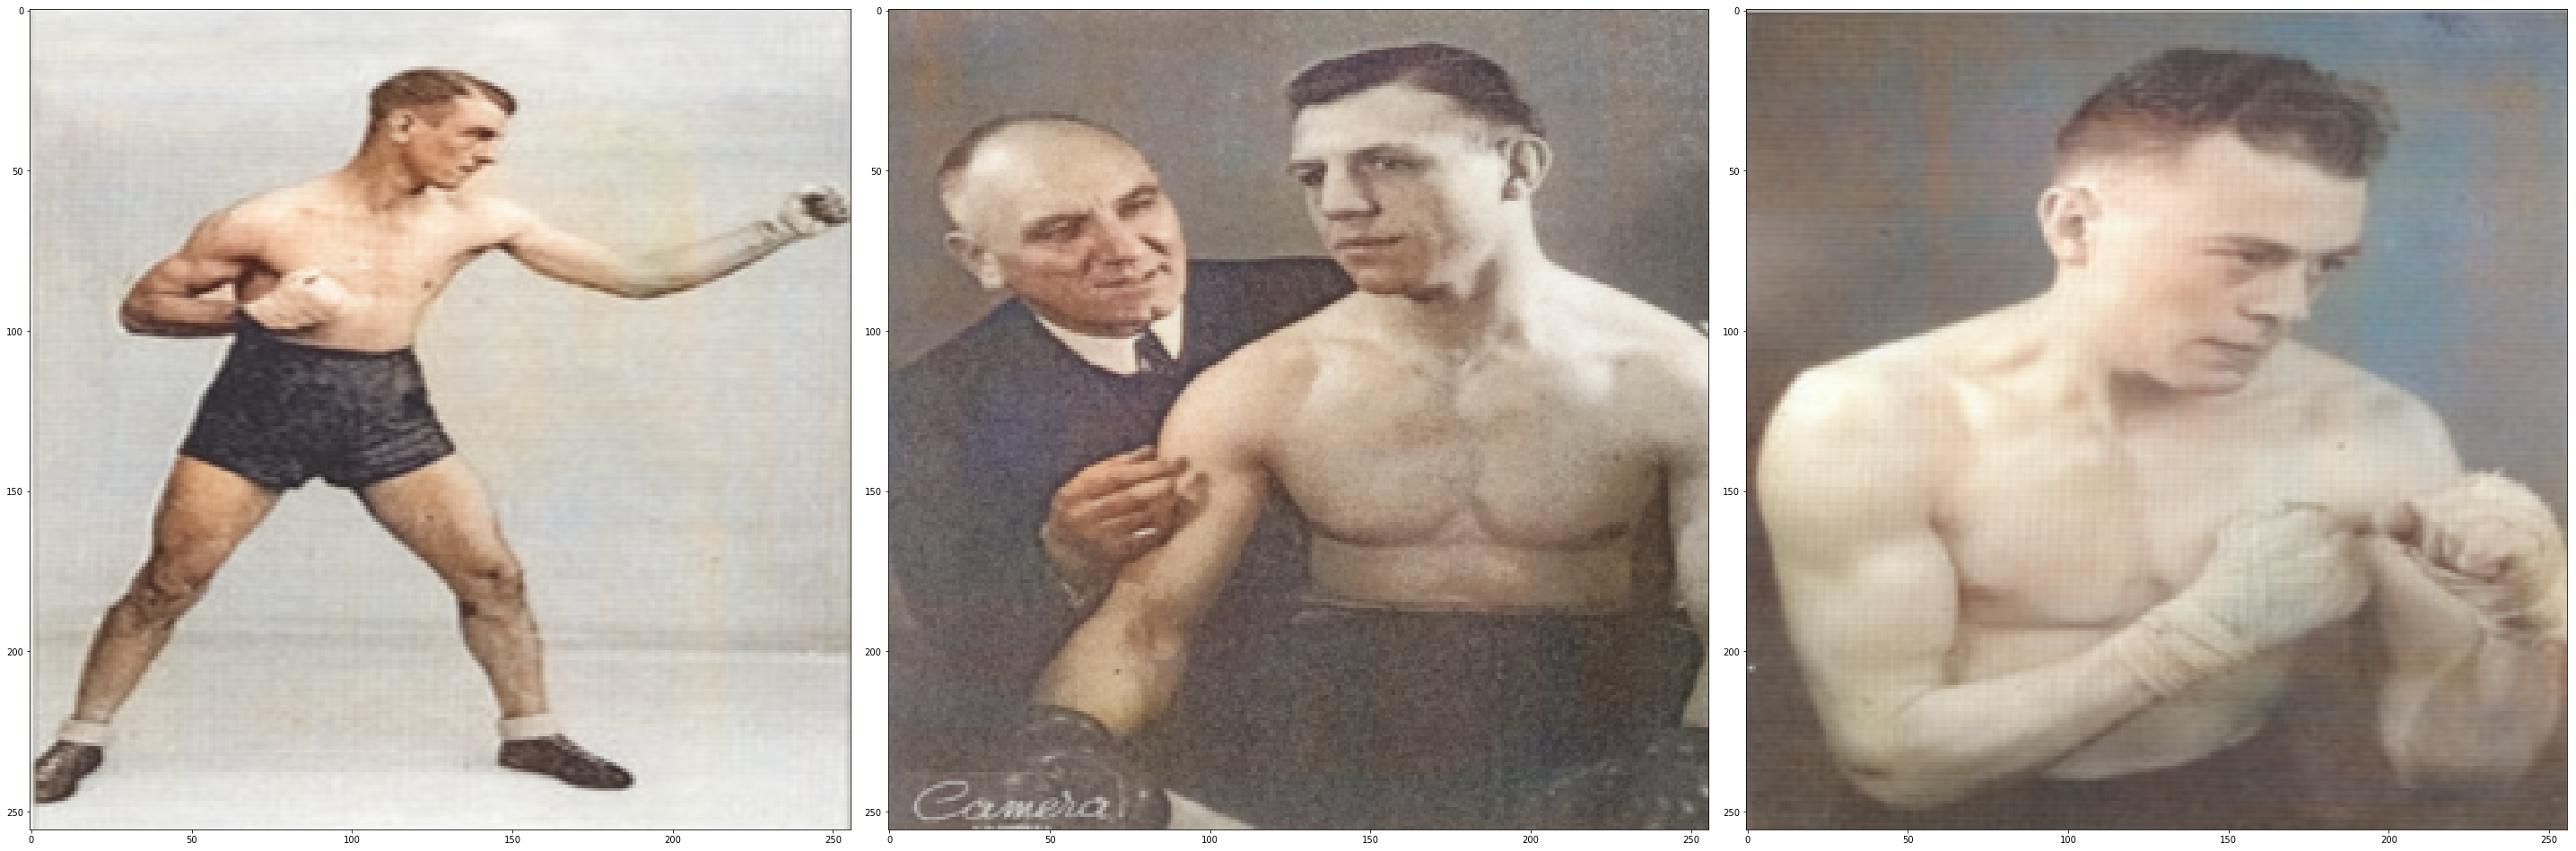

In [0]:
import os

from IPython.display import Image, display
import PIL
import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

outputnames = glob.glob('/content/colorization-pytorch/results/siggraph_caffemodel/val_latest/images/*p000_fake_reg*')
#outputnames = glob.glob('/content/colorization-pytorch/results/siggraph_retrained/val_latest/images/*p000_fake_reg*')

#plt.gray()
fig, ax = plt.subplots(nrows=1,ncols=len(outputnames))  
fig.set_size_inches((40,40))
fig.tight_layout()
for i in range(0,len(outputnames)):
  
  #original
  orig = outputnames[i]
  imgLr = PIL.Image.open(orig)
  ax[i].imshow(imgLr)
  


In [0]:
#zip all outputs
#the colorized images are "...fake_reg...."

!zip -r 'output.zip' '/content/colorization-pytorch/results/siggraph_caffemodel/val_latest/images/' 

updating: content/colorization-pytorch/results/siggraph_caffemodel/val_latest/images/ (stored 0%)
updating: content/colorization-pytorch/results/siggraph_caffemodel/val_latest/images/00000001_0p125_hint_ab.png (deflated 50%)
updating: content/colorization-pytorch/results/siggraph_caffemodel/val_latest/images/00000001_1p000_fake_entr.png (deflated 84%)
updating: content/colorization-pytorch/results/siggraph_caffemodel/val_latest/images/00000001_0p125_fake_ab_reg.png (deflated 0%)
updating: content/colorization-pytorch/results/siggraph_caffemodel/val_latest/images/00000000_0p031_fake_entr.png (deflated 74%)
updating: content/colorization-pytorch/results/siggraph_caffemodel/val_latest/images/00000001_0p125_fake_reg.png (deflated 0%)
updating: content/colorization-pytorch/results/siggraph_caffemodel/val_latest/images/00000002_0p125_hint_ab.png (deflated 53%)
updating: content/colorization-pytorch/results/siggraph_caffemodel/val_latest/images/00000002_0p031_hint.png (deflated 0%)
updating: 